https://hackernoon.com/tf-serving-keras-mobilenetv2-632b8d92983c
Completed

In [2]:
import numpy as np

import keras 
from keras.applications import *
from keras.layers import Dense, Input, Dropout
from keras.models import Model
from keras import backend as K
from keras.layers.core import Dense, Flatten 
from keras.optimizers import Adam 
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization 
from keras.layers.convolutional import *
from matplotlib import pyplot as plt 
from sklearn.metrics import confusion_matrix
import itertools 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [3]:
train_path = 'flower-data/train'
valid_path = 'flower-data/valid'
test_path = 'flower-data/test'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), 
                                                         classes=['rose','daisy','dandelion','sunflower','tulip'], 
                                                         batch_size=58)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['rose','daisy','dandelion','sunflower','tulip'], batch_size=105)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['rose','daisy','dandelion','sunflower','tulip'], batch_size=350)

Found 2435 images belonging to 5 classes.
Found 1050 images belonging to 5 classes.
Found 350 images belonging to 5 classes.


In [4]:
#plots images with labels within jupyter notebook 
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3): 
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=8)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_batches)

/home/paperspace/.local/lib/python3.5/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


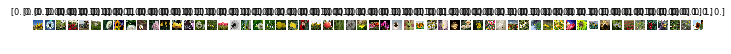

In [6]:
plots(imgs, titles=labels)

## MobileNet Model

In [5]:
from keras.applications.mobilenet import MobileNet
from keras.layers import Dense, Input, Dropout
from keras.models import Model

def build_model( ):
    input_tensor = Input(shape=(224, 224, 3))
    base_model = MobileNet(
        include_top=False,
        weights='imagenet',
        input_tensor=input_tensor,
        input_shape=(224, 224, 3),
        pooling='avg')

    for layer in base_model.layers:
        layer.trainable = True  # trainable has to be false in order to freeze the layers
        
    op = Dense(256, activation='relu')(base_model.output)
    op = Dropout(.25)(op)
    
    ##
    # softmax: calculates a probability for every possible class.
    #
    # activation='softmax': return the highest probability;
    # for example, if 'Coat' is the highest probability then the result would be 
    # something like [0,0,0,0,1,0,0,0,0,0] with 1 in index 5 indicate 'Coat' in our case.
    ##
    output_tensor = Dense(5, activation='softmax')(op)

    model = Model(inputs=input_tensor, outputs=output_tensor)


    return model

In [8]:
model = build_model()
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
print(len(model.layers))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
100


In [6]:
from sklearn.utils import shuffle
def load_data_generator(x, y, batch_size=64):
    num_samples = x.shape[0]
    while 1:  # Loop forever so the generator never terminates
        try:
            shuffle(x)
            for i in range(0, num_samples, batch_size):
                x_data = [preprocess_image(im) for im in x[i:i+batch_size]]
                y_data = y[i:i + batch_size]
            
                # convert to numpy array since this what keras required
                yield shuffle(np.array(x_data), np.array(y_data))
        except Exception as err:
            print(err)

In [10]:
#train_generator = load_data_generator(norm_x_train, encoded_y_train, batch_size=64)
model.fit_generator(
    generator=train_batches,
    steps_per_epoch=50,
    verbose=1,
    epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 2/50 [>.............................] - ETA: 9:24 - loss: 1.8497 - categorical_accuracy: 0.3362 

KeyboardInterrupt: 

In [9]:
from keras.models import load_model

model.save('test.h5')  # creates a HDF5 file 'my_keras_model.h5'
del model  # deletes the existing model

## Confusion Matrix

In [13]:
import numpy as np
from keras.models import load_model
import keras 
from keras import backend as K
from keras.models import Sequential 
from keras.layers import Activation 
from keras.layers.core import Dense, Flatten 
from keras.optimizers import Adam 
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization 
from keras.layers.convolutional import *
from matplotlib import pyplot as plt 
from sklearn.metrics import confusion_matrix
import itertools 
import matplotlib.pyplot as plt 
%matplotlib inline 
from keras.utils.generic_utils import CustomObjectScope

In [14]:
# returns a compiled model
# identical to the previous one

with CustomObjectScope({'relu6': keras.applications.mobilenet.relu6,
                        'DepthwiseConv2D': keras.applications.mobilenet.DepthwiseConv2D}):
    model = load_model('my_keras_model_mobilenet_sophia.h5')
    
all_test_labels = []

Instructions for updating:
Use tf.cast instead.


In [15]:
#plots images with labels within jupyter notebook 
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3): 
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=8)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

Found 350 images belonging to 5 classes.


[array([1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1.], dtype=float32),
 array([0., 1., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., 0., 0.], dtype=float32),
 array([0., 0., 1., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1.], dtype=float32),
 array([0., 1., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0.], dtype=float32),
 array([0., 1., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1.], dtype=float32),
 array([0., 1., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1.], dtype=float32),
 array([0., 0., 1., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., 1., 0.], dtype=float32),
 array([0., 0., 0., 1., 0.], dtype=float32),
 array([0., 0., 1., 0., 0.], dtype=float32),
 array([0., 0., 0., 0., 1.], dtype=float32),
 array([1., 0., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., 1., 0.], dtype=float32),
 array([0., 0., 1., 0., 0.], dtype=float32),
 array([0.

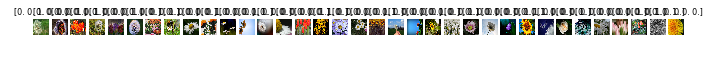

In [16]:
test_path = 'flower-data/test'
image_generator = ImageDataGenerator()

test_batches = image_generator.flow_from_directory(test_path, 
               target_size=(224,224), classes=['rose','daisy','dandelion','sunflower','tulip'], batch_size=35)

for i in range(10):
    test_img, test_labels = next(test_batches)
    all_test_labels.extend(test_labels)
    
plots(test_img, titles=test_labels)
all_test_labels

In [17]:
for row in range(len(all_test_labels)): 
    col = 0
    while all_test_labels[row][col] == 0:
        col = col + 1
        
    all_test_labels[row][0] = col

In [18]:
all_test_labels = np.array(all_test_labels).tolist()

#all_test_labels

for k in range(len(all_test_labels)):
    all_test_labels[k] = all_test_labels[k][0]

all_test_labels

[0.0,
 4.0,
 1.0,
 2.0,
 2.0,
 4.0,
 1.0,
 1.0,
 1.0,
 4.0,
 1.0,
 4.0,
 2.0,
 4.0,
 4.0,
 3.0,
 3.0,
 2.0,
 4.0,
 0.0,
 3.0,
 2.0,
 4.0,
 2.0,
 4.0,
 3.0,
 3.0,
 4.0,
 3.0,
 4.0,
 4.0,
 1.0,
 0.0,
 1.0,
 4.0,
 3.0,
 4.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 3.0,
 4.0,
 1.0,
 1.0,
 4.0,
 4.0,
 2.0,
 4.0,
 1.0,
 4.0,
 3.0,
 4.0,
 1.0,
 2.0,
 2.0,
 2.0,
 4.0,
 4.0,
 1.0,
 1.0,
 2.0,
 4.0,
 4.0,
 2.0,
 1.0,
 1.0,
 1.0,
 0.0,
 2.0,
 2.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 2.0,
 3.0,
 0.0,
 2.0,
 4.0,
 3.0,
 2.0,
 4.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 4.0,
 3.0,
 2.0,
 4.0,
 4.0,
 4.0,
 3.0,
 2.0,
 3.0,
 1.0,
 0.0,
 3.0,
 4.0,
 2.0,
 3.0,
 2.0,
 3.0,
 1.0,
 4.0,
 0.0,
 2.0,
 3.0,
 3.0,
 0.0,
 3.0,
 4.0,
 2.0,
 2.0,
 4.0,
 1.0,
 0.0,
 2.0,
 1.0,
 1.0,
 1.0,
 3.0,
 2.0,
 4.0,
 3.0,
 2.0,
 1.0,
 4.0,
 4.0,
 4.0,
 2.0,
 4.0,
 4.0,
 2.0,
 4.0,
 4.0,
 2.0,
 3.0,
 1.0,
 2.0,
 3.0,
 1.0,
 1.0,
 1.0,
 2.0,
 3.0,
 4.0,
 3.0,
 2.0,
 3.0,
 2.0,
 1.0,
 2.0,
 4.0,
 4.0,
 1.0,
 2.0,
 2.0,
 1.0,
 4.0,
 1.0,
 2.0

In [19]:
predictions = model.predict_generator(test_batches, steps=10, verbose=0)

predictions

array([[9.9990332e-01, 5.5538789e-05, 1.5715090e-08, 4.1529638e-09,
        4.1071609e-05],
       [1.3638919e-02, 8.2208507e-02, 1.8558890e-03, 8.7525195e-01,
        2.7044790e-02],
       [1.1923766e-05, 9.9998379e-01, 4.0299988e-10, 9.5978282e-07,
        3.3897441e-06],
       ...,
       [1.5826116e-04, 9.9585620e-08, 2.3198400e-07, 1.0107454e-08,
        9.9984133e-01],
       [1.1059420e-10, 5.4286243e-06, 9.9999452e-01, 5.3640534e-08,
        6.9918524e-09],
       [6.0610278e-06, 5.2786584e-04, 9.9946481e-01, 2.6040911e-07,
        1.1068711e-06]], dtype=float32)

In [20]:
# Get the indices of maximum element in numpy array

for row in range(len(predictions)):
    max_index = np.where(predictions[row] == np.amax(predictions[row]))

    predictions[row][0]=max_index[0][0]
    
predictions=predictions[:,0]
 
predictions

array([0., 3., 1., 1., 2., 4., 1., 1., 1., 4., 1., 4., 2., 4., 4., 1., 3.,
       2., 4., 4., 3., 2., 0., 2., 4., 3., 3., 4., 3., 4., 4., 1., 0., 3.,
       4., 3., 4., 2., 2., 1., 2., 2., 3., 4., 1., 1., 4., 4., 2., 1., 1.,
       4., 0., 4., 1., 2., 2., 2., 4., 4., 1., 1., 2., 4., 4., 2., 1., 1.,
       1., 4., 2., 2., 4., 4., 4., 0., 4., 2., 3., 0., 2., 4., 4., 2., 2.,
       2., 4., 2., 2., 1., 2., 4., 3., 2., 1., 4., 4., 3., 2., 3., 1., 4.,
       0., 4., 2., 3., 2., 3., 1., 4., 3., 2., 0., 3., 0., 3., 1., 2., 2.,
       4., 1., 0., 2., 1., 1., 0., 3., 2., 4., 0., 2., 1., 4., 4., 4., 2.,
       4., 1., 2., 4., 4., 2., 3., 1., 2., 3., 1., 1., 1., 2., 3., 4., 3.,
       1., 3., 2., 1., 2., 4., 4., 1., 1., 2., 0., 4., 1., 2., 4., 4., 2.,
       1., 3., 2., 1., 2., 2., 1., 3., 4., 3., 3., 2., 2., 3., 2., 3., 1.,
       4., 1., 3., 4., 2., 2., 4., 3., 4., 4., 3., 3., 4., 2., 3., 1., 2.,
       2., 3., 1., 2., 1., 1., 3., 1., 1., 0., 2., 4., 4., 4., 2., 2., 2.,
       4., 1., 2., 3., 2.

In [21]:
all_test_labels

[0.0,
 4.0,
 1.0,
 2.0,
 2.0,
 4.0,
 1.0,
 1.0,
 1.0,
 4.0,
 1.0,
 4.0,
 2.0,
 4.0,
 4.0,
 3.0,
 3.0,
 2.0,
 4.0,
 0.0,
 3.0,
 2.0,
 4.0,
 2.0,
 4.0,
 3.0,
 3.0,
 4.0,
 3.0,
 4.0,
 4.0,
 1.0,
 0.0,
 1.0,
 4.0,
 3.0,
 4.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 3.0,
 4.0,
 1.0,
 1.0,
 4.0,
 4.0,
 2.0,
 4.0,
 1.0,
 4.0,
 3.0,
 4.0,
 1.0,
 2.0,
 2.0,
 2.0,
 4.0,
 4.0,
 1.0,
 1.0,
 2.0,
 4.0,
 4.0,
 2.0,
 1.0,
 1.0,
 1.0,
 0.0,
 2.0,
 2.0,
 4.0,
 0.0,
 4.0,
 0.0,
 4.0,
 2.0,
 3.0,
 0.0,
 2.0,
 4.0,
 3.0,
 2.0,
 4.0,
 2.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 4.0,
 3.0,
 2.0,
 4.0,
 4.0,
 4.0,
 3.0,
 2.0,
 3.0,
 1.0,
 0.0,
 3.0,
 4.0,
 2.0,
 3.0,
 2.0,
 3.0,
 1.0,
 4.0,
 0.0,
 2.0,
 3.0,
 3.0,
 0.0,
 3.0,
 4.0,
 2.0,
 2.0,
 4.0,
 1.0,
 0.0,
 2.0,
 1.0,
 1.0,
 1.0,
 3.0,
 2.0,
 4.0,
 3.0,
 2.0,
 1.0,
 4.0,
 4.0,
 4.0,
 2.0,
 4.0,
 4.0,
 2.0,
 4.0,
 4.0,
 2.0,
 3.0,
 1.0,
 2.0,
 3.0,
 1.0,
 1.0,
 1.0,
 2.0,
 3.0,
 4.0,
 3.0,
 2.0,
 3.0,
 2.0,
 1.0,
 2.0,
 4.0,
 4.0,
 1.0,
 2.0,
 2.0,
 1.0,
 4.0,
 1.0,
 2.0

In [22]:
cm = confusion_matrix(all_test_labels, predictions)

In [23]:
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix. 
    Normalization can be applied by setting 'normalize=True'
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2. 
    for i, j in itertools.product(range(cm.shape[0]), range (cm.shape[1])):
        plt.text(j, i, cm[i, j], 
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black")
        
    plt.tight_layout() 
    plt.ylabel('True label')
    plt.xlabel('Predicted label') 
        

Confusion matrix, without normalization
[[10  0  0  1  9]
 [ 2 64  2  2  0]
 [ 0  4 92  2  2]
 [ 4  2  0 62  2]
 [ 3  8  1  2 76]]


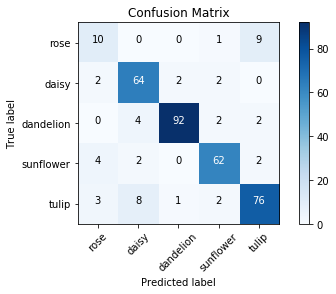

In [24]:
cm_plot_labels = ['rose','daisy','dandelion','sunflower','tulip']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')